/var/folders/pr/hngn4yrn3v3gt3069stbsfqh0000gp/T/ipykernel_31265/50427072.py:17: RuntimeWarning: divide by zero encountered in log
  Vx[mask] = (beta - eta * tau) * x[mask] - beta * kappa * np.log(kappa + x[mask])


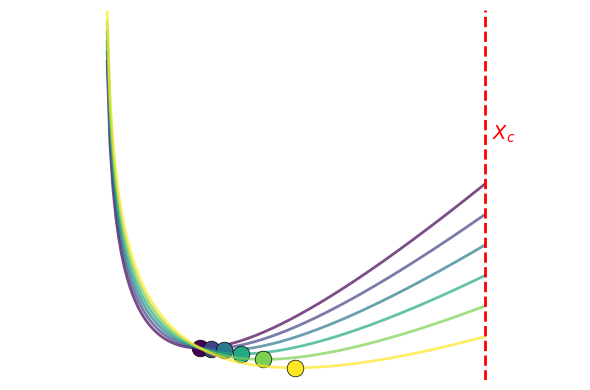

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters for the new potential
beta = 50.0
eta = 0.5
kappa = 0.5
a = 0.5  # Infinite wall at x < -a
Xc = 1.5  # Truncation point to the right: infinite wall at x > Xc

def V(x, tau):
    # Infinite wall to the left of -a, and -inf wall to the right of Xc
    Vx = np.full_like(x, np.inf, dtype=float)
    mask = (x >= -a) & (x <= Xc)
    # V(x) = (beta - eta*tau)*x - beta*kappa*log(kappa + x)
    Vx[mask] = (beta - eta * tau) * x[mask] - beta * kappa * np.log(kappa + x[mask])
    # For x > Xc, set V = -inf
    Vx[x > Xc] = -np.inf
    return Vx

def find_potential_minimum(tau, x_range=np.linspace(-a, Xc, 1000)):
    """Find the x position where the potential is minimum"""
    V_vals = V(x_range, tau)
    # Only consider finite values
    finite_mask = np.isfinite(V_vals)
    if np.any(finite_mask):
        min_idx = np.argmin(V_vals[finite_mask])
        x_min = x_range[finite_mask][min_idx]
        V_min = V_vals[finite_mask][min_idx]
        return x_min, V_min
    return None, None

# Define different tau values to plot
tau_values = [0, 10, 20, 30, 40, 50]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
x_plot = np.linspace(-3, 3, 400)

# Get a colormap for different tau values
colors = cm.viridis(np.linspace(0, 1, len(tau_values)))

# Plot each potential with different tau
for i, tau in enumerate(tau_values):
    color = colors[i]
    
    # Calculate potential for this tau
    V_plot = V(x_plot, tau)
    V_plot_plot = np.copy(V_plot)
    V_plot_plot[np.isinf(V_plot_plot)] = np.nan
    
    # Plot the potential curve
    ax.plot(x_plot, V_plot_plot, color=color, lw=2, alpha=0.7)
    
    # Find the center (minimum of potential) and place ball there
    x_center, V_center = find_potential_minimum(tau)
    if x_center is not None:
        ax.plot(x_center, V_center, 'o', color=color, ms=12, markeredgecolor='black', markeredgewidth=0.5)

# Draw the right infinite wall as a vertical line
ax.axvline(Xc, color='r', linestyle='--', lw=2)

# Annotate Xc on the plot
# Calculate max V from all tau values for annotation position
max_V = -np.inf
for tau in tau_values:
    V_plot = V(x_plot, tau)
    V_plot_plot = np.copy(V_plot)
    V_plot_plot[np.isinf(V_plot_plot)] = np.nan
    finite_V = V_plot_plot[np.isfinite(V_plot_plot)]
    if len(finite_V) > 0:
        max_V = max(max_V, np.nanmax(finite_V))

ax.annotate(
    r'$X_c$', 
    xy=(Xc, max_V * 0.7), 
    xytext=(5, 0), 
    textcoords='offset points',
    color='r',
    fontsize=14,
    ha='left',
    va='center',
    fontweight='bold',
)

ax.set_xlim(-1, 2)

# Set y-limits based on all potentials
min_V = np.inf
max_V = -np.inf
for tau in tau_values:
    V_plot = V(x_plot, tau)
    V_plot_plot = np.copy(V_plot)
    V_plot_plot[np.isinf(V_plot_plot)] = np.nan
    finite_V = V_plot_plot[np.isfinite(V_plot_plot)]
    if len(finite_V) > 0:
        min_V = min(min_V, np.nanmin(finite_V))
        max_V = max(max_V, np.nanmax(finite_V))

ax.set_ylim(min_V - 3, max_V + 0.5)

# Remove axis, spines, and legend
ax.set_axis_off()
for spine in ax.spines.values():
    spine.set_visible(False)
if hasattr(ax, "legend_") and ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()


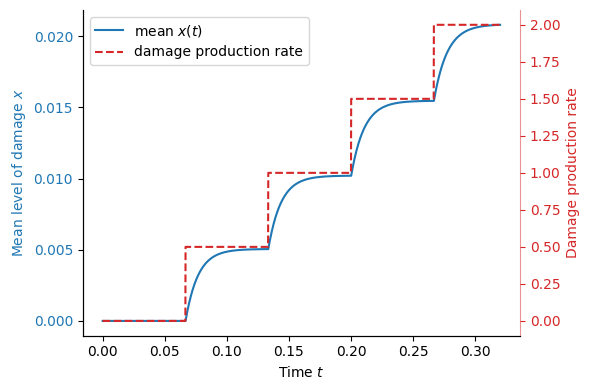

In [26]:
# Plot the equation dx/dt = eta*t - beta*x/(kappa+x)
# with initial condition x(0) = 0, and show eta*n as a function of time on a twin axis
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta = 0.5      # production rate
beta = 50      # degradation rate
kappa = 0.5    # Michaelis-Menten constant

# Time
t = np.linspace(0, 0.32, 2000)

# Compute n(t) for use in ODE and its value for plotting
n_array = np.floor(t * 15)
eta_n = eta * n_array

# ODE: dx/dt = eta*n - beta*x/(kappa + x)
def dxdt(x, t):
    n = np.floor(t * 15)
    return eta * n - (beta * x / (kappa + x))

# Solve using Euler's Method
x = np.zeros_like(t)
dt = t[1] - t[0]
for i in range(1, len(t)):
    x[i] = x[i-1] + dxdt(x[i-1], t[i-1]) * dt

# Plot
fig, ax1 = plt.subplots(figsize=(6, 4))
color1 = "tab:blue"
ln1, = ax1.plot(t, x, color=color1, label=r"mean $x(t)$" )
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("Mean level of damage $x$", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.spines['right'].set_visible(False)
# Twin axis for eta*n
ax2 = ax1.twinx()
color2 = "tab:red"
ln2, = ax2.plot(t, eta_n, color=color2, linestyle="--", label=r"damage production rate")
ax2.set_ylabel(r"Damage production rate", color=color2)
ax2.tick_params(axis='y', labelcolor=color2, colors=color2)
# Right spine and ticks red, remove top spine, set right spine alpha
ax2.spines['right'].set_color(color2)
ax2.spines['right'].set_alpha(0.5)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_tick_params(color=color2)
for tick in ax2.get_yticklabels():
    tick.set_color(color2)

# Also remove top spine from ax1 for consistency
ax1.spines['top'].set_visible(False)

# Combine legends
lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

fig.savefig("plots/QSS_explanation_figure.pdf")

fig.tight_layout()
plt.show()
